# Creating and Analyzing a Process

In [ ]:
# Initialize the process via a transition matrix 
# Double check the process by visualizng the transition dynamics
# Give an overview of the MSP analysis tooling

# Recovering MSPs from a Trained Transformer

In [ ]:
# Load the transformer
# Do the static analysis for the 2D cases (Z1R, Mess3)
# Do the static analysis for the 3D cases (RRXOR)

# Do the training dynamics analysis for Mess3

In [1]:
from epsilon_transformers.persistence import S3Persister
from epsilon_transformers.training.configs import RawModelConfig, TrainConfig

persister = S3Persister(collection_location="mess3-param-change")

/usr/lib/python3/dist-packages/requests/__init__.py:87: RequestsDependencyWarning: urllib3 (2.0.7) or chardet (4.0.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
/home/lucas/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = RawModelConfig(
        d_vocab=3,
        d_model=64,
        n_ctx=10,
        d_head=8,
        n_head=1,
        d_mlp=256,
        n_layers=4,
    ).to_hooked_transformer(seed=1337, device='cpu')

persister.load_model(model_class=model, object_name='4800000.pt')

<All keys matched successfully>

/tmp/ipykernel_23056/2258372910.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


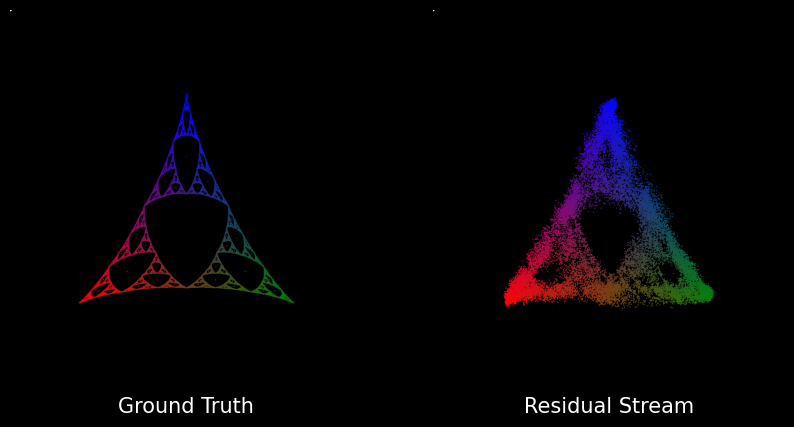

In [4]:
from epsilon_transformers.analysis.activation_analysis import find_msp_subspace_in_residual_stream
from epsilon_transformers.process.processes import Mess3
from epsilon_transformers.visualization.plots import plot_ground_truth_and_evaluated_2d_simplex


process = Mess3()

belief_states_reshaped, predicted_beliefs = find_msp_subspace_in_residual_stream(model=model, process=process, num_sequences=10000)
fig = plot_ground_truth_and_evaluated_2d_simplex(ground_truth_tensor=belief_states_reshaped, predicted_beliefs=predicted_beliefs, plot_triangles=True, facecolor='black', px=1)

fig.show()

# Training a Transformer

In [ ]:
# Train a transformer from scratch
# Demonstrate your script for running sweeps
# Explain the neccessary 
# 